In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
import re
import seaborn as sns

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
!pip install pyramid-arima

In [ ]:
from pyramid.arima import auto_arima 

In [ ]:
#forecasting of the apple shares
apple=pd.read_csv('/content/drive/My Drive/GRIPfoundation/Stockmarket/appleshare.csv')
apple

,Date,Open,High,Low,Close,Adj Close,Volume
0,8/8/2008,42.790001,44.169998,41.450001,44.099998,42.299274,3248400
1,8/11/2008,44.540001,44.570000,43.160000,43.720001,41.934803,2258300
2,8/12/2008,43.500000,44.070000,43.049999,43.759998,41.973156,1641400
3,8/13/2008,43.419998,43.650002,42.209999,43.450001,41.675819,1785400
4,8/14/2008,43.330002,45.000000,43.009998,44.240002,42.433556,1166600
...,...,...,...,...,...,...,...
1984,6/27/2016,153.740005,155.699997,152.199997,153.779999,151.642273,2242500
1985,6/28/2016,154.869995,157.160004,154.279999,156.979996,154.797791,1533700
1986,6/29/2016,158.029999,161.779999,158.029999,161.009995,158.771759,1560000
1987,6/30/2016,161.020004,161.699997,159.500000,161.630005,159.383118,791600


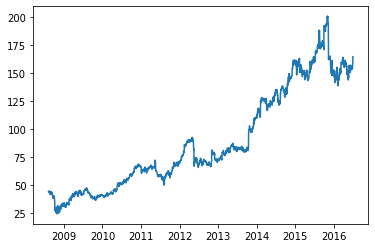

In [ ]:
#let us check whether the model can be used for time series analysis
apple_testing=pd.read_csv('/content/drive/My Drive/GRIPfoundation/Stockmarket/appleshare.csv',index_col='Date',parse_dates=True)
plt.plot(apple_testing['Close'])
#after the plotting we understand that the plot of close proces has a trend hence arima analysis can be applied

In [ ]:
apple_stock=apple[['Close']]
apple_stock

,Close
0,44.099998
1,43.720001
2,43.759998
3,43.450001
4,44.240002
...,...
1984,153.779999
1985,156.979996
1986,161.009995
1987,161.630005


In [ ]:
#now divide the apple_stock to training and testing set
#train the arima model using the data and do forecast or prediction on the test data and then validate it by using rms score
train_apple_stock=apple_stock.iloc[:1100]
test_apple_stock=apple_stock.iloc[1100:]  

In [ ]:
train_apple_stock

,Close
0,44.099998
1,43.720001
2,43.759998
3,43.450001
4,44.240002
...,...
1095,73.029999
1096,72.589996
1097,73.050003
1098,72.900002


In [ ]:
test_apple_stock

,Close
1100,71.680000
1101,70.269997
1102,70.779999
1103,70.599998
1104,71.339996
...,...
1984,153.779999
1985,156.979996
1986,161.009995
1987,161.630005


In [ ]:
model_forecast = auto_arima(train_apple_stock, start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   
                          suppress_warnings = True,  
                          stepwise = True)     

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=3419.453, BIC=3444.414, Fit time=13.012 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=5987.742, BIC=5997.726, Fit time=0.112 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 12); AIC=3777.032, BIC=3797.000, Fit time=3.490 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=5033.844, BIC=5053.812, Fit time=3.088 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 1, 12); AIC=3421.321, BIC=3451.274, Fit time=13.223 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 0, 12); AIC=4103.090, BIC=4123.058, Fit time=0.861 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 2, 12); AIC=3421.223, BIC=3451.175, Fit time=34.107 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 2, 12); AIC=3423.160, BIC=3458.105, Fit time=25.658 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=3422.606, BIC=3452.559, Fit time=14.134 seconds
Fit ARIMA: order=(1, 0,

In [ ]:
model_forecast.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1100
Model:             SARIMAX(1, 0, 0)x(0, 1, 1, 12)   Log Likelihood               -1705.294
Date:                            Sat, 10 Oct 2020   AIC                           3418.588
Time:                                    09:02:04   BIC                           3438.556
Sample:                                         0   HQIC                          3426.146
                                           - 1100                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0049      0.003      1.745      0.081      -0.001       0.010
ar.L1          0.9892      0.005    186.050      0.000       0.979       1.000
ma.S.L12      -0.9994      0.460     -2.174      0.030      -1.901      -0.098
sigma2         1.2816      0.577      2.220      0.026       0.150       2.413
===================================================================================
Ljung-Box (Q):                       37.94   Jarque-Bera (JB):             36534.55
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):               1.99   Skew:                            -1.19
Prob(H) (two-sided):                  0.00   Kurtosis:                        31.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#now use this model to do the forecast
prediction=model_forecast.predict(n_periods=889)

In [ ]:
#check the mean square error for validating how accurate are the values obtained 
def rootmeansqr_meansqr(prediction,test_apple_stock):
  sum=0
  for i in range(0,len(test_apple_stock)):
    sum+=(prediction[i]-test_apple_stock.values[i])**2
  rmse=np.sqrt(sum/len(test_apple_stock))
  mse=sum/len(test_apple_stock)
  return rmse,mse
rmse,mse=rootmeansqr_meansqr(prediction,test_apple_stock)
print("root_mean_sqare error:",rmse[0])
print("mean squre error:",mse[0])

root_mean_sqare error: 44.215874165722354
mean squre error: 1955.0435282389938


In [ ]:
#converting prediction array to a pandas data frame
prediction_dataframe=pd.DataFrame(prediction,columns=['Forecast'],index=test_apple_stock.index)


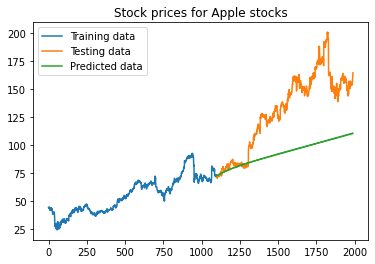

In [ ]:
#now let us plot the training,testing and prediction values over the graph
plt.plot(train_apple_stock,label='Training data')
plt.plot(test_apple_stock,label='Testing data')
plt.plot(prediction_dataframe,label='Predicted data')
plt.legend()
plt.title("Stock prices for Apple stocks")
plt.show()

In [ ]:
#now let us analyse the top headlines
headlines=pd.read_csv('/content/drive/My Drive/GRIPfoundation/Stockmarket/Top_headlines.csv')
headlines.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',b'Rice Gives Green Light for Israel to Attack ...,b'Announcing:Class Action Lawsuit on Behalf of...,"b""So---Russia and Georgia are at war and the N...","b""China tells Bush to stay out of other countr...",b'Did World War III start today?',b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",b'Russia presses deeper into Georgia; U.S. say...,b'Abhinav Bindra wins first ever Individual Ol...,b' U.S. ship heads for Arctic to define territ...,b'Drivers in a Jerusalem taxi station threaten...,b'The French Team is Stunned by Phelps and the...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar',"b'Gorbachev: ""Georgian military attacked the S...",b'CNN use footage of Tskhinvali ruins to cover...,b'Beginning a war as the Olympics were opening...,b'55 pyramids as large as the Luxor stacked in...,b'The 11 Top Party Cities in the World',b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who k

In [235]:
#clean the features
#lower the case
#remove punctuation marks
#combine them into a features
import re
def combining_cleaning(headlines):
  combined=[]
  for i in range(0,len(headlines.index)):
    combined.append(' '.join(str(x).lower() for x in headlines.iloc[i,2:27]))
  for i in range(0,len(combined)):
    combined[i]=re.sub("b[(')]+",'',combined[i])
    combined[i]=re.sub("\'",'',combined[i])
    combined[i]=re.sub('b[(")]+','',combined[i])
    combined[i]=re.sub('[(")]','',combined[i])
    combined[i]=re.sub("[^a-z]"," ",combined[i])
  headlines["combined_features"]=combined
  return headlines
combining_cleaning(headlines).head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,combined_features
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',b'Rice Gives Green Light for Israel to Attack ...,b'Announcing:Class Action Lawsuit on Behalf of...,"b""So---Russia and Georgia are at war and the N...","b""China tells Bush to stay out of other countr...",b'Did World War III start today?',b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",georgia downs two russian warplanes as countri...
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",b'Russia presses deeper into Georgia; U.S. say...,b'Abhinav Bindra wins first ever Individual Ol...,b' U.S. ship heads for Arctic to define territ...,b'Drivers in a Jerusalem taxi station threaten...,b'The French Team is Stunned by Phelps and the...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",why wont america and nato help us if they won...
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar',"b'Gorbachev: ""Georgian military attacked the S...",b'CNN use footage of Tskhinvali ruins to cover...,b'Beginning a war as the Olympics were opening...,b'55 pyramids as large as the Luxor stacked in...,b'The 11 Top Party Cities in the World',b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",remember that adorable year ol

In [ ]:
headlines_combined=[]
for i in range(0,len(headlines.index)):
  headlines_combined.append(headlines['combined_features'][i])
countvector=CountVectorizer()
count_features=countvector.fit_transform(headlines_combined)

In [ ]:
#splitting the data into test and training data
X=headlines[['combined_features']]
y=headlines[['Label']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
X_train=X_train.reset_index()
X_test=X_test.reset_index()
y_train=y_train.reset_index()
y_test=y_test.reset_index()

In [ ]:
X_train

,index,combined_features
0,1694,russian official severely beaten after reporti...
1,1597,each time police shut pirate bay well multipl...
2,482,iran woman adulterer will not face stoning bp...
3,842,iranian tv airs footage of captured us drone a...
4,372,internet uprising overturns australian censors...
...,...,...
1387,835,uk experiencing the worst disruption to servic...
1388,1216,edward snowden the whistleblower behind revel...
1389,1653,study confirms that abstinence education has u...
1390,559,wikileaks ready to drop a bombshell on russia ...


In [ ]:
X_test

,index,combined_features
0,1292,irans new president yes the holocaust happen...
1,1310,china smog emergency shuts city of million ...
2,960,france to cap executive pay at state firms no...
3,107,the video the israeli army didnt want you to s...
4,1556,doctors without borders loses medics to ebol...
...,...,...
592,108,greece hinders us arms delivery to israel cana...
593,1611,most cases of cancer are the result of sheer b...
594,1415,solar power is now just as cheap as convention...
595,2,remember that adorable year old who sang at ...


In [ ]:
y_train

,index,Label
0,1694,1
1,1597,1
2,482,1
3,842,1
4,372,1
...,...,...
1387,835,1
1388,1216,0
1389,1653,1
1390,559,0


In [ ]:
y_test

,index,Label
0,1292,1
1,1310,1
2,960,0
3,107,0
4,1556,0
...,...,...
592,108,0
593,1611,1
594,1415,1
595,2,0


In [ ]:
def countfeatures_train_test(X_train,X_test):
  headlines_combined_train=[]
  headlines_combined_test=[]
  for i in range(0,len(X_train.index)):
    headlines_combined_train.append(X_train['combined_features'][i])
  for i in range(0,len(X_test.index)):
    headlines_combined_test.append(X_test['combined_features'][i])
  count_features_train=countvector.fit_transform(headlines_combined_train)
  count_features_test=countvector.transform(headlines_combined_test)
  return count_features_train,count_features_test
count_features_train,count_features_test=countfeatures_train_test(X_train,X_test)

In [ ]:
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy',random_state=0)
randomclassifier.fit(count_features_train,y_train['Label'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
predict_sent_rand=randomclassifier.predict(count_features_test)

In [ ]:
cm_rand=confusion_matrix(y_test['Label'],predict_sent_rand)
acc_score_rand=accuracy_score(y_test['Label'],predict_sent_rand)
rand_sent_report=classification_report(y_test['Label'],predict_sent_rand)
print(cm)
print(acc_score_rand)
print(rand_sent_report)

[[ 59 222]
 [ 54 262]]
0.5376884422110553
              precision    recall  f1-score   support

           0       0.52      0.21      0.30       281
           1       0.54      0.83      0.65       316

    accuracy                           0.54       597
   macro avg       0.53      0.52      0.48       597
weighted avg       0.53      0.54      0.49       597



In [ ]:
log_sent=LogisticRegression()
log_sent.fit(count_features_train,y_train['Label'])
predict_sent_log=log_sent.predict(count_features_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
cm_log=confusion_matrix(y_test['Label'],predict_sent_log)
acc_score_log=accuracy_score(y_test['Label'],predict_sent_log)
log_sent_report=classification_report(y_test['Label'],predict_sent_log)
print(cm_log)
print(acc_score_log)
print(log_sent_report)

[[124 157]
 [141 175]]
0.5008375209380235
              precision    recall  f1-score   support

           0       0.47      0.44      0.45       281
           1       0.53      0.55      0.54       316

    accuracy                           0.50       597
   macro avg       0.50      0.50      0.50       597
weighted avg       0.50      0.50      0.50       597



In [ ]:
lda_sent=LinearDiscriminantAnalysis()
lda_sent.fit(count_features_train.toarray(),y_train['Label'])
predict_sent_lda=lda_sent.predict(count_features_test.toarray())
cm_lda=confusion_matrix(y_test['Label'],predict_sent_lda)
acc_score_lda=accuracy_score(y_test['Label'],predict_sent_lda)
lda_sent_report=classification_report(y_test['Label'],predict_sent_lda)
print(cm_lda)
print(acc_score_lda)
print(lda_sent_report)

[[ 31 250]
 [ 34 282]]
0.52428810720268
              precision    recall  f1-score   support

           0       0.48      0.11      0.18       281
           1       0.53      0.89      0.67       316

    accuracy                           0.52       597
   macro avg       0.50      0.50      0.42       597
weighted avg       0.51      0.52      0.44       597



In [ ]:
decision_sent=DecisionTreeClassifier()
decision_sent.fit(count_features_train,y_train['Label'])
predict_sent_decision=decision_sent.predict(count_features_test)
cm_decision=confusion_matrix(y_test['Label'],predict_sent_decision)
acc_score_decision=accuracy_score(y_test['Label'],predict_sent_decision)
decision_sent_report=classification_report(y_test['Label'],predict_sent_decision)
print(cm_decision)
print(acc_score_decision)
print(decision_sent_report)

[[136 145]
 [148 168]]
0.509212730318258
              precision    recall  f1-score   support

           0       0.48      0.48      0.48       281
           1       0.54      0.53      0.53       316

    accuracy                           0.51       597
   macro avg       0.51      0.51      0.51       597
weighted avg       0.51      0.51      0.51       597



In [ ]:
svm_sent=SVC()
svm_sent.fit(count_features_train,y_train['Label'])
predict_sent_svm=svm_sent.predict(count_features_test)
cm_svm=confusion_matrix(y_test['Label'],predict_sent_svm)
acc_score_svm=accuracy_score(y_test['Label'],predict_sent_svm)
svm_sent_report=classification_report(y_test['Label'],predict_sent_svm)
print(cm_svm)
print(acc_score_svm)
print(svm_sent_report)

[[  6 275]
 [  3 313]]
0.5343383584589615
              precision    recall  f1-score   support

           0       0.67      0.02      0.04       281
           1       0.53      0.99      0.69       316

    accuracy                           0.53       597
   macro avg       0.60      0.51      0.37       597
weighted avg       0.60      0.53      0.39       597



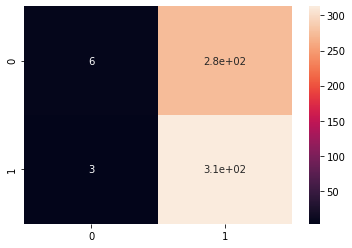

In [ ]:
sns.heatmap(cm_svm,annot=True)

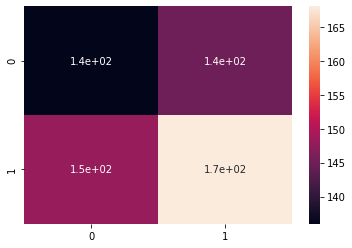

In [ ]:
sns.heatmap(cm_decision,annot=True)

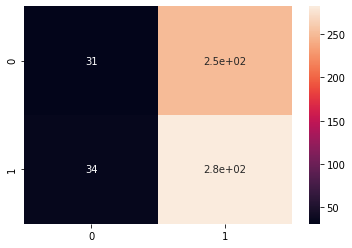

In [ ]:
sns.heatmap(cm_lda,annot=True)

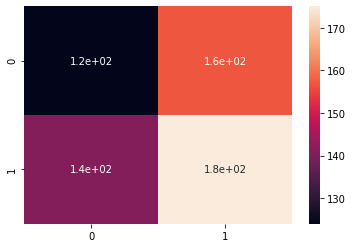

In [ ]:
sns.heatmap(cm_log,annot=True)

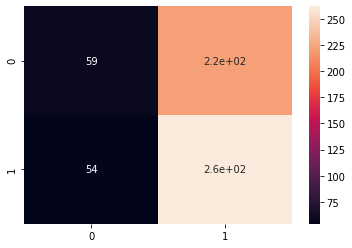

In [ ]:
sns.heatmap(cm_rand,annot=True)

In [236]:
#now let us merge our stock prices and news headlines to get effective analysis
apple_stock=pd.read_csv('/content/drive/My Drive/GRIPfoundation/Stockmarket/appleshare.csv')
from datetime import datetime
for i in range(0,len(apple_stock)):
  X=datetime.strptime(apple_stock['Date'][i], '%m/%d/%Y').strftime('%Y-%m-%d')
  apple_stock['Date'][i]=X
apple_stock.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-08-08,42.790001,44.169998,41.450001,44.099998,42.299274,3248400
1,2008-08-11,44.540001,44.570000,43.160000,43.720001,41.934803,2258300
2,2008-08-12,43.500000,44.070000,43.049999,43.759998,41.973156,1641400
3,2008-08-13,43.419998,43.650002,42.209999,43.450001,41.675819,1785400
4,2008-08-14,43.330002,45.000000,43.009998,44.240002,42.433556,1166600


In [ ]:
#now let us combine apple_stock and headlines on 'Date' 
headlines_apple=headlines.merge(apple_stock,how='inner',on='Date')

In [233]:
headlines_apple.columns

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25', 'combined_features', 'Open', 'High', 'Low', 'Close',
       'Adj Close', 'Volume', 'polarity', 'subjectivity', 'negativity',
       'positivity', 'neutrality'],
      dtype='object')

In [ ]:
headlines_apple.describe()

,Label,Open,High,Low,Close,Adj Close,Volume
count,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03
mean,0.535445,88.654585,89.640151,87.699879,88.702363,86.883184,1.179127e+06
std,0.498867,44.803831,45.202272,44.395081,44.815595,44.415575,8.871917e+05
min,0.000000,25.000000,26.219999,24.030001,24.170000,23.218027,1.307000e+05
25%,0.000000,52.759998,53.419998,52.270000,53.000000,51.492523,6.680000e+05
50%,1.000000,72.849998,73.559998,72.070000,72.830002,71.241982,9.529000e+05
75%,1.000000,128.309998,129.990005,127.129997,128.410004,126.171173,1.389400e+06
max,1.000000,201.240005,201.240005,198.160004,200.380005,197.362900,1.431240e+07


In [ ]:
#find the polarity and subjectivity of the combined features
polarity=[]
subjectivity=[]
negativity=[]
positivity=[]
neutrality=[]
for i in range(0,len(headlines_apple.index)):
  polarity.append(TextBlob(headlines_apple['combined_features'][i]).sentiment.polarity)
  subjectivity.append(TextBlob(headlines_apple['combined_features'][i]).sentiment.subjectivity)
  negativity.append(sid.polarity_scores(headlines_apple['combined_features'][i])['neg'])
  positivity.append(sid.polarity_scores(headlines_apple['combined_features'][i])['pos'])
  neutrality.append(sid.polarity_scores(headlines_apple['combined_features'][i])['neu'])

In [ ]:
headlines_apple['polarity']=polarity
headlines_apple['subjectivity']=subjectivity
headlines_apple['negativity']=negativity
headlines_apple['positivity']=positivity
headlines_apple['neutrality']=neutrality

In [234]:
headlines_apple.columns

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25', 'combined_features', 'Open', 'High', 'Low', 'Close',
       'Adj Close', 'Volume', 'polarity', 'subjectivity', 'negativity',
       'positivity', 'neutrality'],
      dtype='object')

In [ ]:
X_merge=headlines_apple[['Open','High','Low','Volume','polarity','subjectivity','negativity','positivity','neutrality']]
y_merge=headlines_apple[['Label']]

In [ ]:
X_merge

,Open,High,Low,Volume,polarity,subjectivity,negativity,positivity,neutrality
0,42.790001,44.169998,41.450001,3248400,-0.048568,0.267549,0.234,0.057,0.708
1,44.540001,44.570000,43.160000,2258300,0.109325,0.374806,0.187,0.101,0.712
2,43.500000,44.070000,43.049999,1641400,-0.033202,0.510370,0.135,0.052,0.813
3,43.419998,43.650002,42.209999,1785400,0.005842,0.364021,0.156,0.068,0.776
4,43.330002,45.000000,43.009998,1166600,0.049050,0.390095,0.201,0.101,0.698
...,...,...,...,...,...,...,...,...,...
1984,153.740005,155.699997,152.199997,2242500,-0.014015,0.352311,0.165,0.089,0.746
1985,154.869995,157.160004,154.279999,1533700,0.047722,0.349330,0.136,0.105,0.758
1986,158.029999,161.779999,158.029999,1560000,0.075882,0.417835,0.237,0.112,0.651
1987,161.020004,161.699997,159.500000,791600,0.011243,0.382566,0.213,0.063,0.725


In [ ]:
y_merge

,Label
0,0
1,1
2,0
3,0
4,1
...,...
1984,0
1985,1
1986,1
1987,1


In [ ]:
X_merge_train,X_merge_test,y_merge_train,y_merge_test=train_test_split(X_merge,y_merge,test_size=0.3,random_state=0)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[ 43 238]
 [ 37 279]]
0.5393634840871022
              precision    recall  f1-score   support

           0       0.54      0.15      0.24       281
           1       0.54      0.88      0.67       316

    accuracy                           0.54       597
   macro avg       0.54      0.52      0.45       597
weighted avg       0.54      0.54      0.47       597

AxesSubplot(0.125,0.125;0.62x0.755)


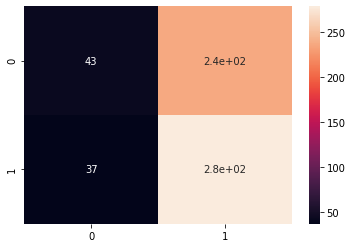

In [ ]:
from sklearn import svm
svmclf_merge=svm.SVC(kernel='rbf',degree=5,class_weight='balanced')
svmclf_merge.fit(X_merge_train,y_merge_train) 
y_pred_svm=svmclf_merge.predict(X_merge_test)
print(confusion_matrix(y_merge_test,y_pred_svm))
print(accuracy_score(y_merge_test,y_pred_svm))
print(classification_report(y_merge_test,y_pred_svm))
print(sns.heatmap(confusion_matrix(y_merge_test,y_pred_svm),annot=True))

[[127 154]
 [149 167]]
0.49246231155778897
              precision    recall  f1-score   support

           0       0.46      0.45      0.46       281
           1       0.52      0.53      0.52       316

    accuracy                           0.49       597
   macro avg       0.49      0.49      0.49       597
weighted avg       0.49      0.49      0.49       597

AxesSubplot(0.125,0.125;0.62x0.755)


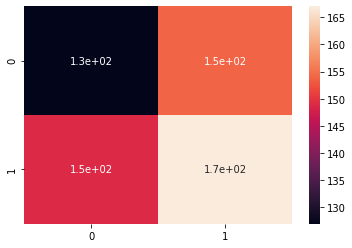

In [229]:
decclf_merge = DecisionTreeClassifier(random_state=0)
decclf_merge.fit(X_merge_train,y_merge_train)
y_pred_dec=decclf_merge.predict(X_merge_test)
print(confusion_matrix(y_merge_test,y_pred_dec))
print(accuracy_score(y_merge_test,y_pred_dec))
print(classification_report(y_merge_test,y_pred_dec))
print(sns.heatmap(confusion_matrix(y_merge_test,y_pred_dec),annot=True))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[ 81 200]
 [ 64 252]]
0.5577889447236181
              precision    recall  f1-score   support

           0       0.56      0.29      0.38       281
           1       0.56      0.80      0.66       316

    accuracy                           0.56       597
   macro avg       0.56      0.54      0.52       597
weighted avg       0.56      0.56      0.53       597

AxesSubplot(0.125,0.125;0.62x0.755)


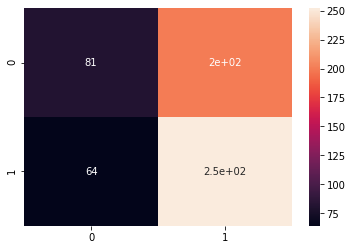

In [230]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(X_merge_train, y_merge_train)
y_pred_lda=clf_lda.predict(X_merge_test)
print(confusion_matrix(y_merge_test,y_pred_lda))
print(accuracy_score(y_merge_test,y_pred_lda))
print(classification_report(y_merge_test,y_pred_lda))
print(sns.heatmap(confusion_matrix(y_merge_test,y_pred_lda),annot=True))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[  0 281]
 [  0 316]]
0.5293132328308208
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       281
           1       0.53      1.00      0.69       316

    accuracy                           0.53       597
   macro avg       0.26      0.50      0.35       597
weighted avg       0.28      0.53      0.37       597

AxesSubplot(0.125,0.125;0.62x0.755)


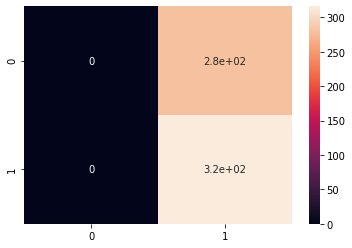

In [231]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_merge_train,y_merge_train)
y_pred_log=log.predict(X_merge_test)
print(confusion_matrix(y_merge_test,y_pred_log))
print(accuracy_score(y_merge_test,y_pred_log))
print(classification_report(y_merge_test,y_pred_log))
print(sns.heatmap(confusion_matrix(y_merge_test,y_pred_log),annot=True))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[[ 28 253]
 [ 31 285]]
0.52428810720268
              precision    recall  f1-score   support

           0       0.47      0.10      0.16       281
           1       0.53      0.90      0.67       316

    accuracy                           0.52       597
   macro avg       0.50      0.50      0.42       597
weighted avg       0.50      0.52      0.43       597

AxesSubplot(0.125,0.125;0.62x0.755)


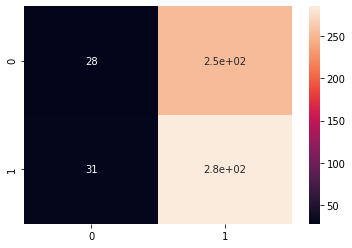

In [232]:
clf_rand = RandomForestClassifier(max_depth=2, random_state=0)
clf_rand.fit(X_merge_train, y_merge_train)
y_pred_rand=clf_rand.predict(X_merge_test)
print(confusion_matrix(y_merge_test,y_pred_rand))
print(accuracy_score(y_merge_test,y_pred_rand))
print(classification_report(y_merge_test,y_pred_rand))
print(sns.heatmap(confusion_matrix(y_merge_test,y_pred_rand),annot=True))